In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt

In [2]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='12345678',
    database='aqi_data'
)

cursor = conn.cursor()

query = "SELECT * FROM air_quality_data"
cursor.execute(query)

rows = cursor.fetchall()

columns = [desc[0] for desc in cursor.description]

df = pd.DataFrame(rows, columns=columns)

cursor.close()
conn.close()

print(df.head())

  country  state      city                          station  \
0   India  Bihar  Motihari  Gandak Colony, Motihari - BSPCB   
1   India  Bihar  Motihari  Gandak Colony, Motihari - BSPCB   
2   India  Bihar  Motihari  Gandak Colony, Motihari - BSPCB   
3   India  Bihar    Munger        Town Hall, Munger - BSPCB   
4   India  Bihar    Munger        Town Hall, Munger - BSPCB   

          last_update   latitude  longitude pollutant_id  min_value  \
0 2025-07-31 17:00:00  26.630860  84.900510        PM2.5        NaN   
1 2025-07-31 17:00:00  26.630860  84.900510          NH3        NaN   
2 2025-07-31 17:00:00  26.630860  84.900510        OZONE        2.0   
3 2025-07-31 17:00:00  25.376776  86.471523        PM2.5        8.0   
4 2025-07-31 17:00:00  25.376776  86.471523          SO2       10.0   

   max_value  avg_value  
0        NaN        NaN  
1        NaN        NaN  
2       10.0        3.0  
3       80.0       37.0  
4       15.0       13.0  


In [3]:
df.info


<bound method DataFrame.info of      country           state        city  \
0      India           Bihar    Motihari   
1      India           Bihar    Motihari   
2      India           Bihar    Motihari   
3      India           Bihar      Munger   
4      India           Bihar      Munger   
...      ...             ...         ...   
2107   India  Andhra_Pradesh    Tirumala   
2108   India  Andhra_Pradesh    Tirupati   
2109   India  Andhra_Pradesh    Tirupati   
2110   India  Andhra_Pradesh  Vijayawada   
2111   India  Andhra_Pradesh  Vijayawada   

                                    station         last_update   latitude  \
0           Gandak Colony, Motihari - BSPCB 2025-07-31 17:00:00  26.630860   
1           Gandak Colony, Motihari - BSPCB 2025-07-31 17:00:00  26.630860   
2           Gandak Colony, Motihari - BSPCB 2025-07-31 17:00:00  26.630860   
3                 Town Hall, Munger - BSPCB 2025-07-31 17:00:00  25.376776   
4                 Town Hall, Munger - BSPCB 2025-

In [4]:
df.columns

Index(['country', 'state', 'city', 'station', 'last_update', 'latitude',
       'longitude', 'pollutant_id', 'min_value', 'max_value', 'avg_value'],
      dtype='object')

### we dont need columns like(country,last_update,latitude,longitude)

it will make data clean and fast

In [5]:
df.drop(columns=['country', 'last_update', 'latitude', 'longitude'], inplace=True)

print("Data cleaned by removing unnecessary columns.")
print(df.head())

Data cleaned by removing unnecessary columns.
   state      city                          station pollutant_id  min_value  \
0  Bihar  Motihari  Gandak Colony, Motihari - BSPCB        PM2.5        NaN   
1  Bihar  Motihari  Gandak Colony, Motihari - BSPCB          NH3        NaN   
2  Bihar  Motihari  Gandak Colony, Motihari - BSPCB        OZONE        2.0   
3  Bihar    Munger        Town Hall, Munger - BSPCB        PM2.5        8.0   
4  Bihar    Munger        Town Hall, Munger - BSPCB          SO2       10.0   

   max_value  avg_value  
0        NaN        NaN  
1        NaN        NaN  
2       10.0        3.0  
3       80.0       37.0  
4       15.0       13.0  


In [6]:
df.dropna(inplace=True)

print("Data cleaned by removing rows with missing values.")
print(df.head())

Data cleaned by removing rows with missing values.
   state         city                             station pollutant_id  \
2  Bihar     Motihari     Gandak Colony, Motihari - BSPCB        OZONE   
3  Bihar       Munger           Town Hall, Munger - BSPCB        PM2.5   
4  Bihar       Munger           Town Hall, Munger - BSPCB          SO2   
5  Bihar       Munger           Town Hall, Munger - BSPCB        OZONE   
6  Bihar  Muzaffarpur  Buddha Colony, Muzaffarpur - BSPCB         PM10   

   min_value  max_value  avg_value  
2        2.0       10.0        3.0  
3        8.0       80.0       37.0  
4       10.0       15.0       13.0  
5        8.0       12.0       10.0  
6       28.0       47.0       37.0  


In [7]:
df[df['pollutant_id'] == 'PM2.5']['avg_value'].mean()

np.float64(37.76573426573427)

In [8]:
max_row = df.loc[df['avg_value'].idxmax()]
print(f"City with the highest pollutant level: {max_row['city']}")
print(f"State: {max_row['state']}")
print(f"Pollutant: {max_row['pollutant_id']}")
print(f"Average Value: {max_row['avg_value']}")


City with the highest pollutant level: Dholpur
State: Rajasthan
Pollutant: PM10
Average Value: 145.0


<Axes: >

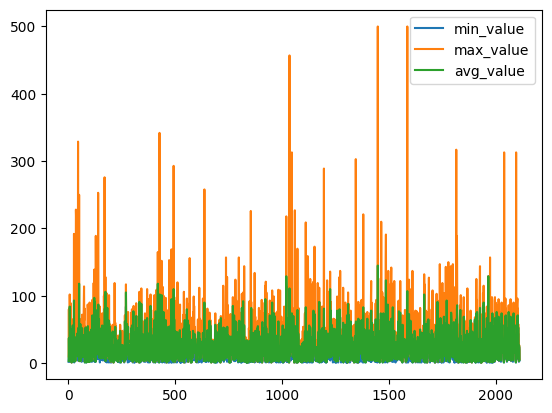

In [9]:
df.plot()


In [10]:
import seaborn as sns
import plotly.express as px

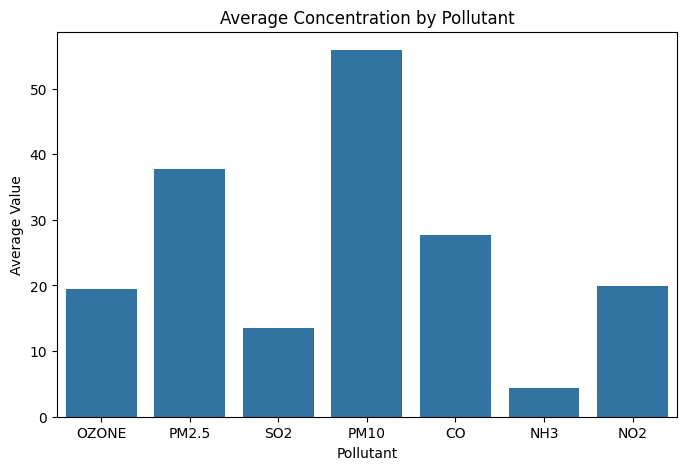

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='pollutant_id', y='avg_value', errorbar=None)
plt.title('Average Concentration by Pollutant')
plt.xlabel('Pollutant')
plt.ylabel('Average Value')
plt.show()


In [12]:
# State-wise Pollution Levels (Grouped Bar Plot)

fig = px.bar(
    df,
    x='state',
    y='avg_value',
    color='pollutant_id',
    barmode='group',
    title='Pollutant Levels by state',
    labels={'avg_value': 'Average Value', 'pollutant_id': 'Pollutant'}
)

fig.update_layout(
    xaxis_title='state',
    yaxis_title='Average Value',
    xaxis_tickangle=-45,
    dragmode='zoom',
    hovermode='x',
    autosize=True,
    legend_title='Pollutant',
    margin=dict(l=40, r=40, t=60, b=120)
)

fig.show()

In [13]:
fig = px.bar(
    df,
    x='station',
    y='avg_value',
    color='pollutant_id',
    barmode='group',
    title='Average Pollution by Station',
    labels={'avg_value': 'Average Value', 'pollutant_id': 'Pollutant'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [14]:
box_df = pd.melt(df, id_vars=['station', 'pollutant_id'], value_vars=['min_value', 'avg_value', 'max_value'],
                 var_name='type', value_name='value')

fig = px.box(
    box_df,
    x='station',
    y='value',
    color='pollutant_id',
    title='Pollution Level Ranges by Station and Pollutant',
    points='all',
    labels={'value': 'Pollutant Value'}
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [15]:
import plotly.graph_objects as go

heat_df = df.pivot_table(index='city', columns='pollutant_id', values='avg_value', aggfunc='mean')

fig = go.Figure(data=go.Heatmap(
        z=heat_df.values,
        x=heat_df.columns,
        y=heat_df.index,
        colorscale='YlOrRd'))

fig.update_layout(title='Average Pollution Levels (City vs Pollutant)', xaxis_title='Pollutant', yaxis_title='City')
fig.show()


In [16]:
line_df = df.pivot_table(index='station', columns='pollutant_id', values='avg_value').reset_index()

fig = px.line(
    line_df,
    x='station',
    y=[col for col in line_df.columns if col != 'station'],
    title='Pollutant Trends Across Stations'
)
fig.update_layout(xaxis_tickangle=-45, yaxis_title='Average Value')
fig.show()


In [17]:

summary = df.groupby('pollutant_id').agg({'avg_value': 'mean', 'min_value': 'mean', 'max_value': 'mean'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(
    x=summary['pollutant_id'],
    y=summary['avg_value'],
    error_y=dict(
        type='data',
        symmetric=False,
        array=summary['max_value'] - summary['avg_value'],
        arrayminus=summary['avg_value'] - summary['min_value']
    ),
    name='Average with Min-Max Error'
))
fig.update_layout(title='Average Pollutant Levels with Error Bars',
                  xaxis_title='Pollutant',
                  yaxis_title='Concentration')
fig.show()
